In [32]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [33]:
#Crear los datos
x =  np.random.randint(1, 101, 10)
y =  np.random.randint(1, 101, 10)

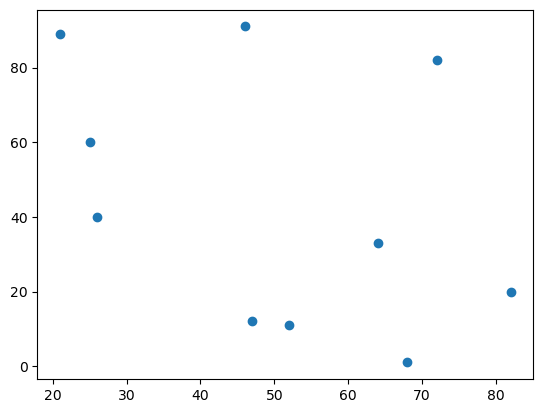

In [34]:
plt.scatter(x, y)

In [35]:
from scipy.interpolate import interp1d

# Nuestros datos a interpolar:
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0, 0.8, 0.9, 0.1, -0.8, -1.0])

# Interpolación lineal
f = interp1d(x, y)

# Interpolación cúbica
f2 = interp1d(x, y, kind='cubic')

In [53]:
interp1d?

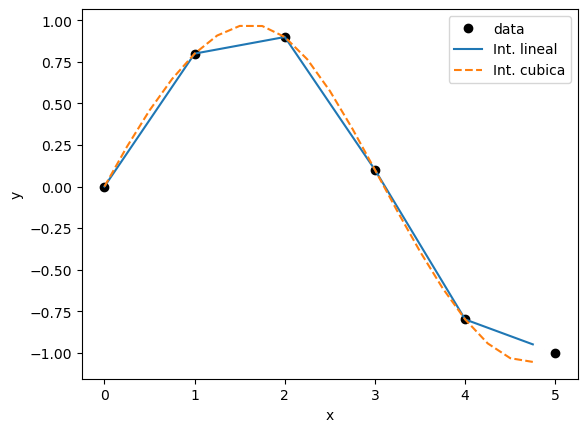

In [36]:
# Valores de x donde evaluaremos la interpolación
#xnew = np.linspace(0, 5, num=41, endpoint=True)
xnew = np.arange(0, 5, 0.25)

# Gráficamos los datos y las interpolaciones:
fig, ax = plt.subplots()

ax.plot(x, y, 'ok', label='data')
ax.plot(xnew, f(xnew), '-', label='Int. lineal')
ax.plot(xnew, f2(xnew), '--', label='Int. cubica')
ax.set_xlabel("x"), ax.set_ylabel("y")
ax.legend(loc='best')

In [46]:
#Aproximacion:

x =  np.random.randint(1, 101, 100)
y =  np.random.randint(1, 101, 100)


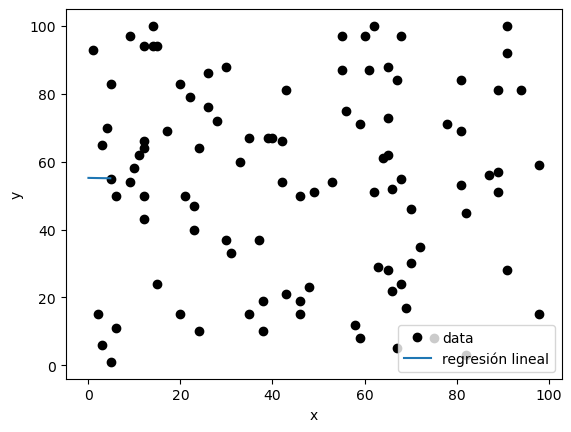

In [47]:
# La regresión lineal ajusta una recta a los datos:

from scipy.stats import linregress

m, n, r_value, p_value, std_err = linregress(x,y)

# Graficamos:
fig, ax = plt.subplots()
ax.plot(x, y, 'ok', label='data')
ax.plot(xnew, m*xnew + n, '-', label='regresión lineal')
ax.set_xlabel("x"), ax.set_ylabel("y")
ax.legend(loc='best')

In [39]:
linregress?

In [49]:
from scipy.optimize import curve_fit

In [50]:
# Definimos la función que seguirán nuestros datos.
# También utilizamos esta definición en el ajuste. 

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

# Generamos datos con ruido a partir de la función
xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise

In [51]:
popt, pcov = curve_fit(func, xdata, ydata)

print("Parámetros optimizados: ", popt)
print("Matriz de covarianza:")
print(pcov)

Parámetros optimizados:  [2.35965185 1.1234465  0.38318423]
Matriz de covarianza:
[[ 0.0099957   0.00312508 -0.00091229]
 [ 0.00312508  0.01272272  0.00477294]
 [-0.00091229  0.00477294  0.00289179]]


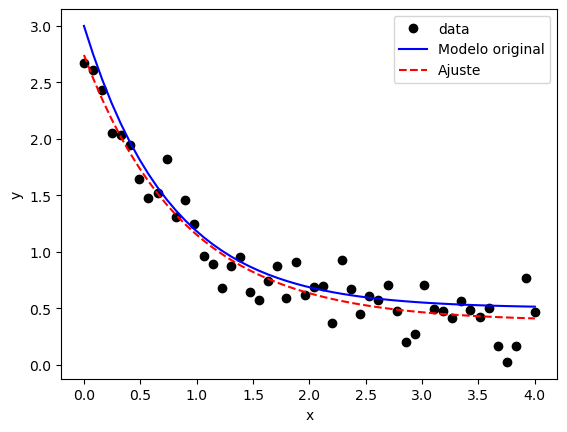

In [52]:
# Finalmente, graficamos los datos, la curva original y la ajustada:

fig, ax = plt.subplots()

ax.plot(xdata, ydata, 'ok', label="data")
ax.plot(xdata, func(xdata, 2.5, 1.3, 0.5), '-b', label="Modelo original")
ax.plot(xdata, func(xdata, *popt), '--r', label="Ajuste")
ax.set_xlabel("x"), ax.set_ylabel("y")
ax.legend(loc='best')